In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv('housing_data_with_null.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0.0,0.0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,770.0,0,1933,0,98028,NaN,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
print(df.columns[df.isnull().any()])

Index(['date', 'bedrooms', 'bathrooms', 'waterfront', 'view', 'sqft_above',
       'lat'],
      dtype='object')


In [4]:
df.info()
print('\n', df.columns[df.isnull().any()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           20317 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       20317 non-null  float64
 4   bathrooms      20317 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     20317 non-null  float64
 9   view           19884 non-null  float64
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     19884 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            19668 non-null  float64
 18  long  

Columns with missing data points are the following: date, bedrooms, bathrooms, waterfront, view, sqft_above, lat

# Remove Data outliers

Create hasBasement and sqft_per_floor variables to aid with data imputation and analysis

In [5]:
df['hasBasement'] = df['sqft_basement'].apply(lambda x: 1 if x> 0 else 0)
df['sqft_per_floor'] = df['sqft_living']/ df['floors']

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,hasBasement,sqft_per_floor
count,2.161300e+04,2.161300e+04,20317.000000,20317.000000,21613.000000,2.161300e+04,21613.000000,20317.000000,19884.000000,21613.000000,21613.000000,19884.000000,21613.000000,21613.000000,21613.000000,21613.000000,19668.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.371216,2.116048,2079.899736,1.510697e+04,1.494309,0.007432,0.233957,3.409430,7.656873,1786.492557,291.509045,1971.005136,84.402258,98077.939805,47.560177,-122.213896,1986.552492,12768.455652,0.392680,1484.947633
std,2.876566e+09,3.671272e+05,0.929973,0.770957,918.440897,4.142051e+04,0.539989,0.085891,0.765118,0.650743,1.175459,827.366219,442.575043,29.373411,401.679240,53.505026,0.138562,0.140828,685.391304,27304.179631,0.488358,654.511957
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,253.333333
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471275,-122.328000,1490.000000,5100.000000,0.000000,1025.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.000000,7620.000000,0.000000,1370.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.000000,1820.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,9640.000000


bedrooms and sqft_lot15 in particular seem to have really high max values vs standard deviation.
We will use a boxplot to explore these 2 variables along with a few other continuous variables to visualize the distribution

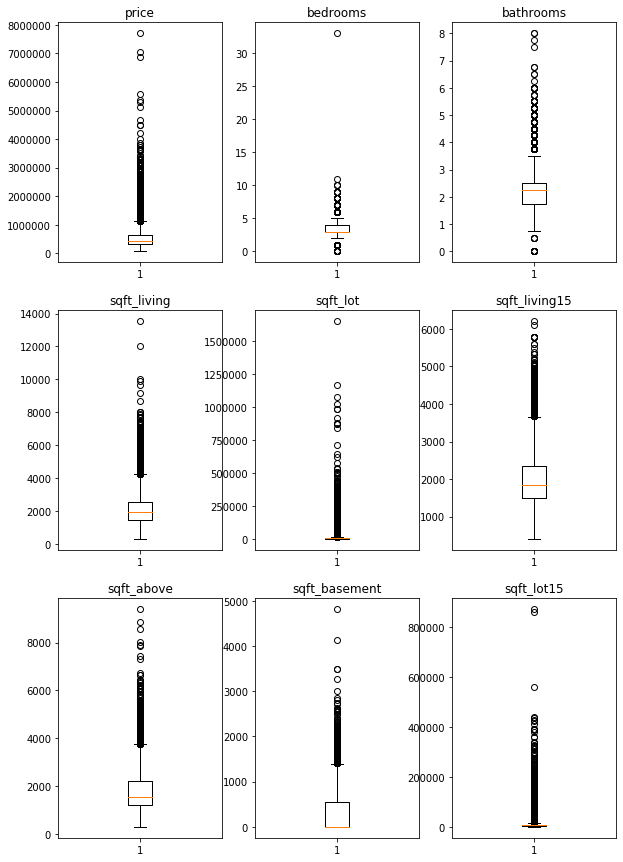

In [7]:
plot_vars = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_above', 'sqft_basement', 'sqft_lot15', ]
fig = plt.figure(figsize = (10,15))

for i in range(len(plot_vars)):
    ax = fig.add_subplot(3,3,i+1)
    df_plot = df[df[plot_vars[i]].notnull()][plot_vars[i]]
    ax.boxplot(df_plot)
    ax.set_title(plot_vars[i])
    

In [8]:
df[df['bedrooms']>20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,hasBasement,sqft_per_floor
15870,2402100895,20140625T000000,640000.0,33.0,1.75,1620,6000,1.0,0.0,0.0,5,7,1040.0,580,1947,0,98103,47.6878,-122.331,1330,4700,1,1620.0


Confirmed that the outlier of 33 for 'bedrooms' is most likely data entry error. Actual value is most likely 3 instead of 33

In [9]:
df.iloc[15870, 3] = 3

In [10]:
df[df['price']>5000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,hasBasement,sqft_per_floor
1164,1247600105,20141020T000000,5110800.0,NaN,NaN,8010,45517,2.0,1.0,4.0,3,12,NaN,2020,1999,0,98033,47.6767,-122.211,3430,26788,1,4005.0
1315,7558700030,20150413T000000,5300000.0,6.0,6.00,7390,24829,2.0,1.0,4.0,4,12,5000.0,2390,1991,0,98040,NaN,-122.210,4320,24619,1,3695.0
1448,8907500070,20150413T000000,5350000.0,NaN,5.00,8000,23985,2.0,NaN,4.0,3,12,6720.0,1280,2009,0,98004,47.6232,-122.220,4600,21750,1,4000.0
3914,9808700762,20140611T000000,7062500.0,5.0,4.50,10040,37325,2.0,1.0,2.0,3,11,NaN,2360,1940,2001,98004,47.6500,-122.214,3930,25449,1,5020.0
4411,2470100110,20140804T000000,5570000.0,5.0,5.75,9200,35069,2.0,0.0,0.0,3,13,6200.0,3000,2001,0,98039,47.6289,-122.233,3560,24345,1,4600.0
7252,6762700020,20141013T000000,7700000.0,6.0,8.00,12050,27600,2.5,0.0,3.0,4,13,8570.0,3480,1910,1987,98102,47.6298,-122.323,3940,8800,1,4820.0
9254,9208900037,20140919T000000,6885000.0,6.0,7.75,9890,31374,2.0,0.0,4.0,3,13,8860.0,1030,2001,0,98039,47.6305,-122.240,4540,42730,1,4945.0


Based on house features, the high prices seem reasonable

In [11]:
df[df['sqft_basement']>3000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,hasBasement,sqft_per_floor
7252,6762700020,20141013T000000,7700000.0,6.0,8.00,12050,27600,2.5,0.0,3.0,4,13,8570.0,3480,1910,1987,98102,47.6298,-122.323,3940,8800,1,4820.000000
8092,1924059029,20140617T000000,4668000.0,5.0,6.75,9640,13068,1.0,1.0,4.0,3,12,4820.0,4820,1983,2009,98040,47.5570,-122.210,3270,10454,1,9640.000000
10085,7767000060,20140912T000000,1900000.0,5.0,4.25,6510,16471,2.0,0.0,3.0,4,11,NaN,3260,1980,0,98040,47.5758,-122.242,4480,16471,1,3255.000000
12777,1225069038,20140505T000000,2280000.0,NaN,8.00,13540,307752,3.0,0.0,4.0,3,12,9410.0,4130,1999,0,98053,47.6675,-121.986,4850,217800,1,4513.333333
15482,624069108,20140812T000000,3200000.0,4.0,NaN,7000,28206,1.0,1.0,4.0,4,12,3500.0,3500,1991,0,98075,47.5928,-122.086,4913,14663,1,7000.000000


Based on other house features such as sqft_living, bedrooms, and bathrooms, the large basement size seem proportional and reasonable

In [12]:
df[df['sqft_lot15']>500000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,hasBasement,sqft_per_floor
9714,225079036,20150107T000000,937500.0,4.0,4.0,5545,871200,2.0,NaN,0.0,3,11,3605.0,1940,2003,0,98014,47.6760,-121.882,3420,871200,1,2772.5
13464,3420069060,20141107T000000,790000.0,3.0,2.5,2640,432036,1.5,0.0,3.0,3,10,2640.0,0,1996,0,98022,47.1795,-122.036,1500,560617,0,1760.0
20452,1125079111,20150415T000000,1600000.0,4.0,5.5,6530,871200,2.0,0.0,2.0,3,11,NaN,0,2008,0,98014,47.6640,-121.878,1280,858132,0,3265.0


Based on google maps review of zipcode, sqft_lot15, and gps coordinates, 
these properties are most likely located in very rural areas where land is more affordable

#### Impute missing values in dataset

###### Bedrooms & Bathrooms
It would seem to make logical sense to impute missing data in bedrooms and bathrooms using the median sqft_living 

In [13]:
df['sqft_living_group'] = pd.qcut(df['sqft_living'], q = 15) #Create bins of sqft_living in increments of 500
df['sqft_floor_group'] = pd.qcut(df['sqft_per_floor'], q = 10) #Create bins of sqft per floor

In [14]:
df['bedrooms'] = df.groupby(['hasBasement', 'sqft_floor_group'])['bedrooms'].apply(lambda x: x.fillna(x.median()))
df['bathrooms'] = df.groupby(['hasBasement', 'sqft_floor_group'])['bathrooms'].apply(lambda x: x.fillna(x.median()))

In [15]:
df.columns[df.isnull().any()]

Index(['date', 'waterfront', 'view', 'sqft_above', 'lat'], dtype='object')

Bedrooms and bathrooms null values have been completely imputed

###### Waterfront & View
As these are boolean variables, we'll impute them by simply using the most common class

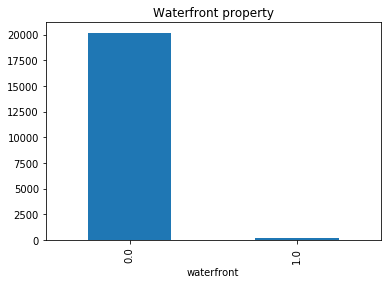

In [16]:
df.groupby(['waterfront']).count()['id'].plot(kind = 'bar', title = 'Waterfront property')

We see tht the vast majority of properties are not waterfront, therefore we'll imput null values to 0

In [17]:
df.groupby(['zipcode']).median()
df[df['view']==0].count()['id'] / df[df['view'].notnull()].count()['id']

0.9017300341983504

Over 90% of the homes have a view rating of '0', and the median view rating for every zipcode is also 0,
therefore, we will impute the null values with 0

In [18]:
df['waterfront'] = df['waterfront'].fillna(df['waterfront'].median())
df['view'] = df['view'].fillna(df.groupby('zipcode')['view'].transform('median'))

In [19]:
df.columns[df.isnull().any()]

Index(['date', 'sqft_above', 'lat'], dtype='object')

View & waterfront have been completely imputted

###### Sqft_above

Fill in sqft_above nulls by subtracting sqft_living by sqft_basement

In [20]:
df['sqft_above'] = df['sqft_above'].fillna(df['sqft_living'] - df['sqft_basement'])

###### Latitude 
Impute null lattitudes by taking the median of each zipcode

In [21]:
df['lat'] = df.groupby(['zipcode'])['lat'].apply(lambda x: x.fillna(x.median()))

###### Date
As date does not have any relations to other variables in the dataset from which we may be able to infer information, we will choose to impute missing values using randomly selected non-null values from the date column

In [22]:
date_values = df[df['date'].notnull()]['date'].tolist()
j = 0
for i in df[df['date'].isnull()].index:
    df['date'].iloc[i] = date_values[j]
    j += 1

C:\Users\268671\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
df.info()
#All missing data have been imputed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 21613 non-null  int64   
 1   date               21613 non-null  object  
 2   price              21613 non-null  float64 
 3   bedrooms           21613 non-null  float64 
 4   bathrooms          21613 non-null  float64 
 5   sqft_living        21613 non-null  int64   
 6   sqft_lot           21613 non-null  int64   
 7   floors             21613 non-null  float64 
 8   waterfront         21613 non-null  float64 
 9   view               21613 non-null  float64 
 10  condition          21613 non-null  int64   
 11  grade              21613 non-null  int64   
 12  sqft_above         21613 non-null  float64 
 13  sqft_basement      21613 non-null  int64   
 14  yr_built           21613 non-null  int64   
 15  yr_renovated       21613 non-null  int64   
 16  zipc

### Exploratory Analysis

Convert date column to year, month, day and remove time component

In [24]:
df['year'] = df['date'].str[:4].astype(int)
df['month'] = df['date'].str[4:6].astype(int)
df['day'] = df['date'].str[6:8].astype(int)
df['date'] = df['date'].str[:8].astype(int)

Convert yr_renovated to categorical variable indicating if a house has been renovated

In [25]:
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x> 0 else 0)

Remove variables used for data pre-processing and redundant variables which will not be used for the analysis

In [26]:
df = df.drop(['sqft_per_floor', 'sqft_floor_group', 'sqft_per_floor', 'date', 'day', 'sqft_living_group'], axis = 1)
df = df.drop(['id','sqft_above', 'sqft_basement', 'yr_renovated'], axis = 1)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,hasBasement,year,month,renovated
0,221900.0,3.0,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,98178,47.51120,-122.257,1340,5650,0,2014,10,0
1,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,98125,47.72100,-122.319,1690,7639,1,2014,12,1
2,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,1933,98028,47.75545,-122.233,2720,8062,0,2015,2,0
3,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,98136,47.52080,-122.393,1360,5000,1,2014,12,0
4,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,98074,47.61680,-122.045,1800,7503,0,2015,2,0


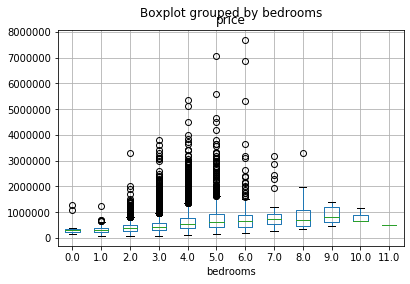

In [27]:
df.boxplot(column = 'price', by = 'bedrooms' )

In [28]:
df[df['bedrooms'] >= 10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,hasBasement,year,month,renovated
8757,520000.0,11.0,3.00,3000,4960,2.0,0.0,0.0,3,7,1918,98106,47.5560,-122.363,1420,4960,1,2014,8,1
13314,1148000.0,10.0,5.25,4590,10920,1.0,0.0,2.0,3,9,2008,98004,47.5861,-122.113,2730,10400,1,2014,8,0
15161,650000.0,10.0,2.00,3610,11914,2.0,0.0,0.0,4,7,1958,98006,47.5705,-122.175,2040,11914,1,2014,10,0
19254,660000.0,10.0,3.00,2920,3745,2.0,0.0,0.0,4,7,1913,98105,47.6635,-122.320,1810,3745,1,2014,12,0


The distribution seem generally reasonable given that houses with more bedrooms are generally more expensive. Based on checking properties near the GPS coordinates, although the homes seem like they have too many bedrooms, they have much larger sqft_living than other homes in the area. It could possibly be explained as being multi family units. Without having exact address, we cannot verify these data points as correct or wrong, so we chose to keep them in the dataset.

Scatter plotting the continuous variables against Price

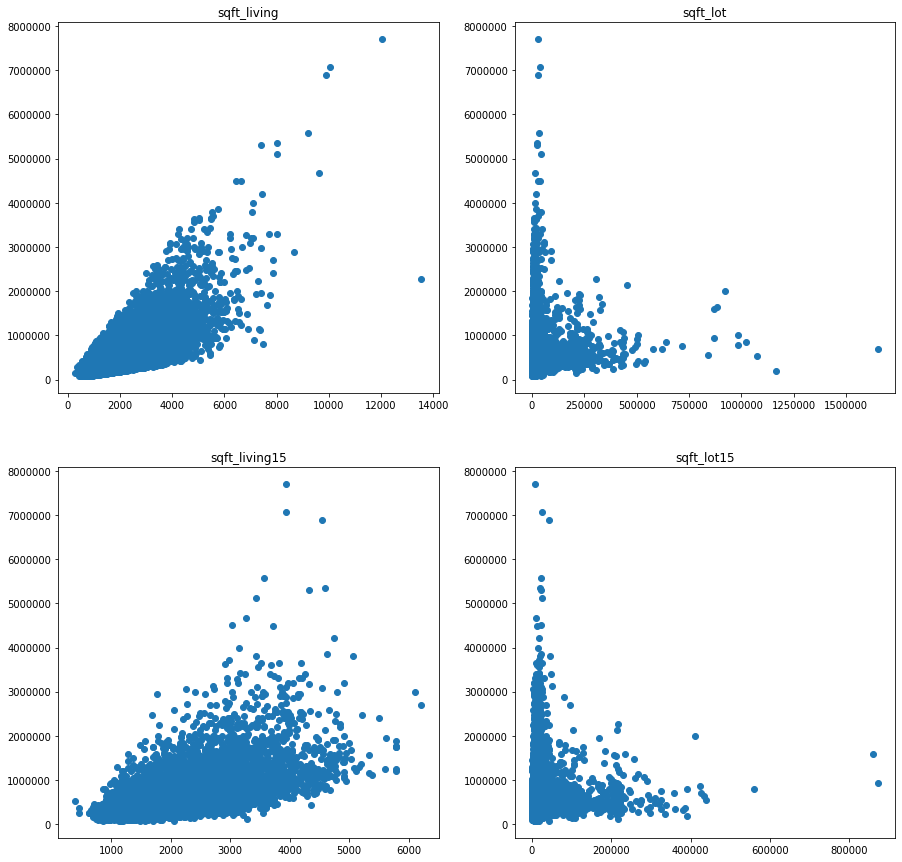

In [29]:
plot_vars = ['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']

fig = plt.figure(figsize = (15,15))

for i in range(1, len(plot_vars)):
    ax = fig.add_subplot(2,2,i)
    df_plot = df[[plot_vars[i],'price']]
    ax.scatter(x = plot_vars[i], y = 'price', data = df_plot)
    ax.set_title(plot_vars[i])
    i += 1


Box plots of categorical variables against Price

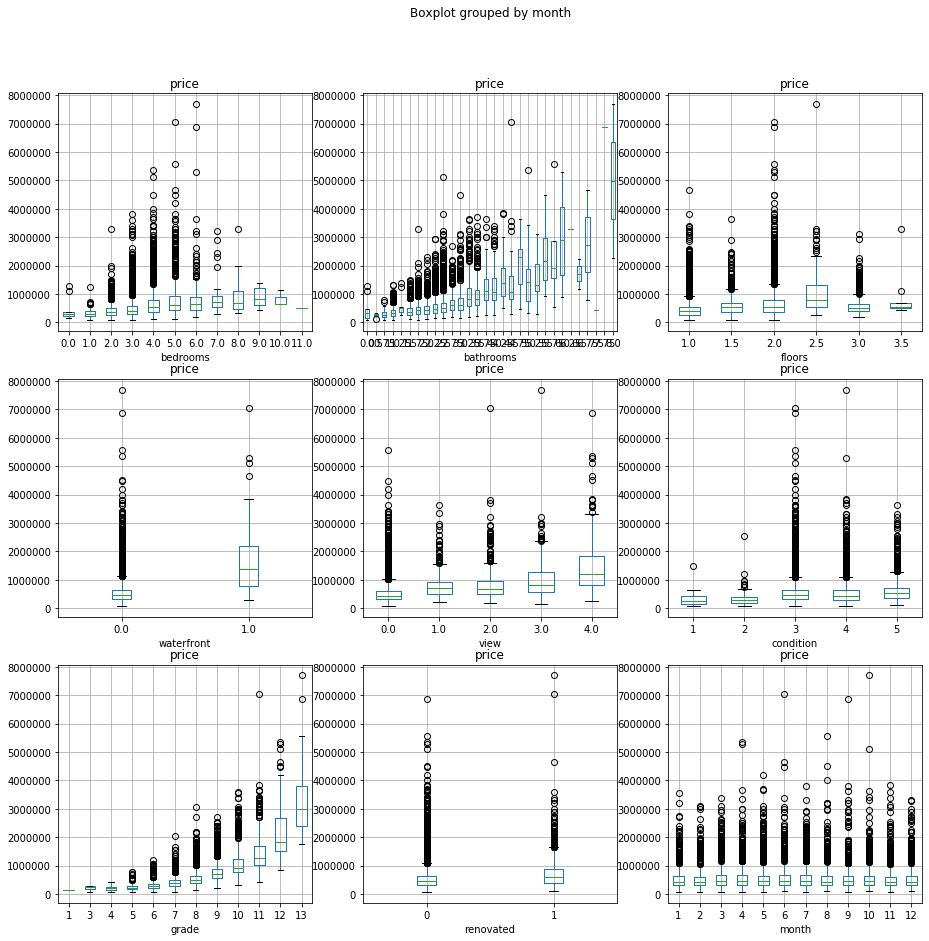

In [30]:
plot_vars = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'renovated', 'month']

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15,15))
df.boxplot(column = 'price', by = plot_vars[0], ax=axes[0,0])
df.boxplot(column = 'price', by = plot_vars[1], ax=axes[0,1])
df.boxplot(column = 'price', by = plot_vars[2], ax=axes[0,2])
df.boxplot(column = 'price', by = plot_vars[3], ax=axes[1,0])
df.boxplot(column = 'price', by = plot_vars[4], ax=axes[1,1])
df.boxplot(column = 'price', by = plot_vars[5], ax=axes[1,2])
df.boxplot(column = 'price', by = plot_vars[6], ax=axes[2,0])
df.boxplot(column = 'price', by = plot_vars[7], ax=axes[2,1])
df.boxplot(column = 'price', by = plot_vars[8], ax=axes[2,2])



##### Split into Training & Test

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [32]:
df_y = df['price']
df_x = df.drop('price', axis = 1)

In [33]:
df_x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,hasBasement,year,month,renovated
0,3.0,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,98178,47.51120,-122.257,1340,5650,0,2014,10,0
1,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,98125,47.72100,-122.319,1690,7639,1,2014,12,1
2,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,1933,98028,47.75545,-122.233,2720,8062,0,2015,2,0
3,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,98136,47.52080,-122.393,1360,5000,1,2014,12,0
4,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,98074,47.61680,-122.045,1800,7503,0,2015,2,0


In [34]:
train_x_org, test_x_org, train_y, test_y = train_test_split(df_x, df_y, random_state = 42)

scaler = MinMaxScaler()

train_x = scaler.fit_transform(train_x_org)
test_x = scaler.transform(test_x_org)

###### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(train_x, train_y)

print("Train Score: ", lreg.score(train_x, train_y))
print("Test Score:", lreg.score(test_x, test_y))

Train Score:  0.6973133280072678
Test Score: 0.7025431651481298


###### Polynomial Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(train_x, train_y)

poly_range = [2, 3]
poly_train_scores = []
poly_test_scores = []

for i in poly_range:
    poly = PolynomialFeatures(degree = i)

    poly_train_x = poly.fit_transform(train_x)
    poly_test_x = poly.fit_transform(test_x)

    poly_reg = LinearRegression()
    poly_reg.fit(poly_train_x, train_y)
    
    poly_train_scores.append(poly_reg.score(poly_train_x, train_y))
    poly_test_scores.append(poly_reg.score(poly_test_x, test_y))


print("Train Score: ", poly_train_scores)
print("Test Score: ", poly_test_scores)

Train Score:  [0.8295684467227422, 0.9066512196494791]
Test Score:  [0.8020239189970382, -1926189666835064.5]


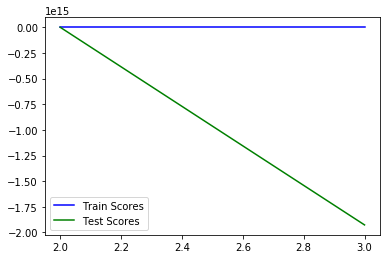

In [37]:
plt.plot(poly_range, poly_train_scores, label = 'Train Scores', color = 'blue')
plt.plot(poly_range, poly_test_scores, label = 'Test Scores', color = 'green')
plt.legend()

The best polynomial regression results using degree = 2

In [38]:
poly = PolynomialFeatures(degree = 2)

poly_train_x = poly.fit_transform(train_x)
poly_test_x = poly.fit_transform(test_x)

poly_reg = LinearRegression()
poly_reg.fit(poly_train_x, train_y)

print(poly_reg.score(poly_train_x, train_y))
print(poly_reg.score(poly_test_x, test_y))

0.8295684467227422
0.8020239189970382


##### Ridge Regression

In [39]:
from sklearn.linear_model import Ridge

train_score_list = []
test_score_list = []

x_range = [0.01, 0.1, 1, 10, 100]

for alpha in x_range:
    ridge = Ridge(alpha)
    ridge.fit(train_x, train_y)
    train_score_list.append(ridge.score(train_x, train_y))
    test_score_list.append(ridge.score(test_x, test_y))
    
print("Train Scores: ",train_score_list, '\n',
      "Test Score: ", test_score_list)

#alpha = 0.01 gave the best train and test score

Train Scores:  [0.6973133179542076, 0.6973123347701446, 0.6972245369062247, 0.6930838816784226, 0.6461696042523309] 
 Test Score:  [0.7025405443043596, 0.7025162590199799, 0.7022123628852104, 0.6966570212244986, 0.6443571578755674]


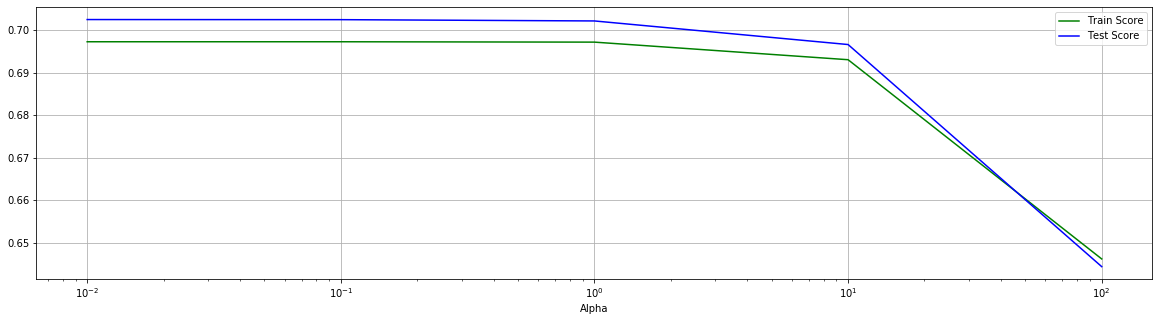

In [40]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend()
plt.xlabel('Alpha')
plt.grid()

In [41]:
ridge = Ridge(alpha = 0.01)
ridge.fit(train_x, train_y)
print('Train score: {:.4f}'.format(ridge.score(train_x, train_y)))
print('Test Score: {:.4f}'.format(ridge.score(test_x, test_y)))

Train score: 0.6973
Test Score: 0.7025


The best Ridge model uses an alpha = 0.01

##### Lasso Regression

In [42]:
from sklearn.linear_model import Lasso

train_score_list = []
test_score_list = []

x_range = [0.01, 0.1, 1, 10, 100]

for alpha in x_range:
    lasso = Lasso(alpha)
    lasso.fit(train_x, train_y)
    train_score_list.append(lasso.score(train_x, train_y))
    test_score_list.append(lasso.score(test_x, test_y))
    
print("Train Scores: ",train_score_list, '\n',
      "Test Score: ", test_score_list)

#alpha = 0.01 gave the best train and test score

Train Scores:  [0.6973133280007673, 0.6973133273554122, 0.6973132630137906, 0.6973068582489039, 0.6970488175962447] 
 Test Score:  [0.7025430875686639, 0.702542393845006, 0.7025354352494528, 0.7024582653118505, 0.7017282555603188]


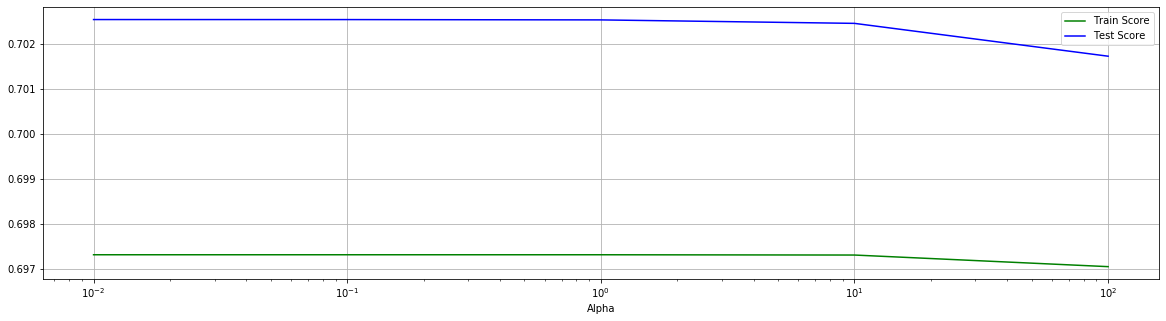

In [43]:
%matplotlib inline

plt.figure(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend()
plt.xlabel('Alpha')
plt.grid()

In [47]:
lasso = Lasso(alpha = 0.01)
lasso.fit(train_x, train_y)
print('Train score: {:.4f}'.format(ridge.score(train_x, train_y)))
print('Test Score: {:.4f}'.format(ridge.score(test_x, test_y)))

Train score: 0.6973
Test Score: 0.7025


The best Lasso model uses an alpha of 0.01

##### Support Vector Machine (Simple)

In [45]:
from sklearn.svm import LinearSVR
train_score_list = []
test_score_list = []
x_range = [1, 10, 100, 1000, 10000,100000, 1000000, 10000000]

for i in x_range:
    regr = LinearSVR(C = i, random_state = 42)
    regr.fit(train_x, train_y)
    train_score_list.append(regr.score(train_x, train_y))
    test_score_list.append(regr.score(test_x, test_y))

print("Train Scores: ", train_score_list)
print('\n')
print("Test Scores: ", test_score_list)

Train Scores:  [-1.7608847816198905, -0.240748392196982, 0.15957516080430878, 0.48885850713072754, 0.6204577346655743, 0.6468895161532867, 0.6511787131408725, 0.6490098331201253]


Test Scores:  [-1.594623929377952, -0.22990345327893633, 0.1467183726909873, 0.4749399610035883, 0.6141157683640808, 0.6430286427078634, 0.6484099098271985, 0.6454606262097784]


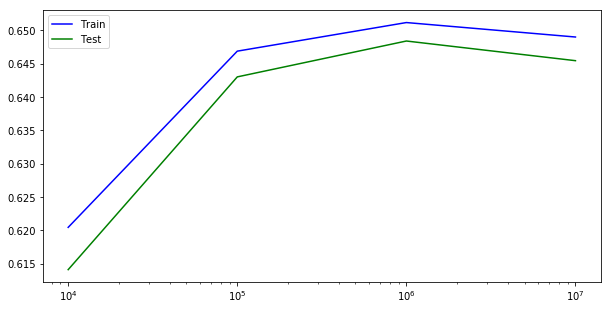

In [46]:
plt.figure(figsize = (10,5))
plt.plot(x_range[4:], train_score_list[4:], color = 'blue', label = 'Train')
plt.plot(x_range[4:], test_score_list[4:], color = 'green', label = 'Test')
plt.xscale('log')
plt.legend()

In [47]:
regr = LinearSVR(C = 1000000, random_state = 42)
regr.fit(train_x, train_y)
print('Train score: {:.4f}'.format(regr.score(train_x, train_y)))
print('Test score: {:.4f}'.format(regr.score(test_x, test_y)))


Train score: 0.6512
Test score: 0.6484


The best Linear SVR model used a C hyperparameter of 1,000,000.

##### Support Vector Machine - rbf

In [48]:
param_grid = {'C': [10,100,1000,10000,100000, 1000000],
              'gamma': [0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [10, 100, 1000, 10000, 100000, 1000000], 'gamma': [0.01, 0.1, 1, 10, 100]}


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [50]:
grid_search = GridSearchCV(SVR(), param_grid, cv=3, return_train_score=True, n_jobs = -1)

In [51]:
grid_search.fit(train_x, train_y)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [10, 100, 1000, 10000, 100000, 1000000], 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [52]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1000000, 'gamma': 1}
Best cross-validation score: 0.80


In [53]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,9.371110,0.563199,2.981345,0.281646,10,0.01,"{'C': 10, 'gamma': 0.01}",-0.052337,-0.060930,-0.063894,-0.059054,0.004901,28,-0.062241,-0.057628,-0.056162,-0.058677,0.002590
1,9.295528,0.422211,2.762486,0.092345,10,0.1,"{'C': 10, 'gamma': 0.1}",-0.049201,-0.058869,-0.060197,-0.056089,0.004900,25,-0.058519,-0.055624,-0.052945,-0.055696,0.002276
2,9.191700,0.468259,3.199306,0.248442,10,1,"{'C': 10, 'gamma': 1}",-0.045614,-0.055849,-0.055748,-0.052404,0.004801,23,-0.053952,-0.052859,-0.049179,-0.051997,0.002041
3,8.769302,0.775040,3.284102,0.232376,10,10,"{'C': 10, 'gamma': 10}",-0.051649,-0.060212,-0.063087,-0.058316,0.004858,27,-0.061322,-0.056938,-0.055462,-0.057907,0.002489
4,10.219150,0.353266,2.818387,0.134740,10,100,"{'C': 10, 'gamma': 100}",-0.052744,-0.061182,-0.064380,-0.059435,0.004908,30,-0.062682,-0.057843,-0.056555,-0.059027,0.002638


([<matplotlib.axis.YTick at 0x2b5b6bd1c0f0>,
 <a list of 6 Text yticklabel objects>)

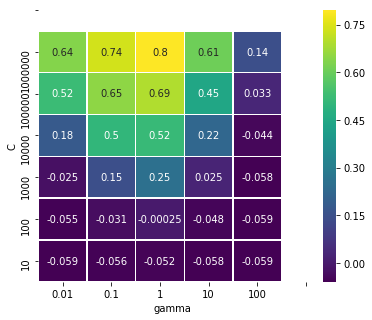

In [54]:
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(6,5))
scores = np.array(results.mean_test_score).reshape(6, 5)
sns.heatmap(scores, linewidths = 0.5 , cmap='viridis', annot=True)
plt.xlabel('gamma')
plt.ylabel('C')
plt.xlim(0, 5)
plt.ylim(0, 6)
plt.xticks(np.arange(6)+0.5, [ 0.01, 0.1, 1, 10, 100])
plt.yticks(np.arange(7)+0.5, [10,100,1000,10000,100000, 1000000])

In [55]:
grid_search_linear = GridSearchCV(SVR(kernel='linear'), param_grid, cv=3, return_train_score=True, n_jobs = -1)

In [56]:
grid_search_linear.fit(train_x, train_y)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [10, 100, 1000, 10000, 100000, 1000000], 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [57]:
print("Best parameters: {}".format(grid_search_linear.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_linear.best_score_))

Best parameters: {'C': 1000000, 'gamma': 0.01}
Best cross-validation score: 0.65


In [58]:
# convert to DataFrame
results_linear = pd.DataFrame(grid_search_linear.cv_results_)
# show the first 5 rows
display(results_linear.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.751927,0.262743,1.230700,0.063736,10,0.01,"{'C': 10, 'gamma': 0.01}",-0.033759,-0.044599,-0.043318,-0.040559,0.004837,26,-0.040482,-0.041714,-0.038146,-0.040114,0.00148
1,5.294985,0.734355,1.423636,0.243189,10,0.1,"{'C': 10, 'gamma': 0.1}",-0.033759,-0.044599,-0.043318,-0.040559,0.004837,26,-0.040482,-0.041714,-0.038146,-0.040114,0.00148
2,4.943155,0.160914,1.246163,0.112788,10,1,"{'C': 10, 'gamma': 1}",-0.033759,-0.044599,-0.043318,-0.040559,0.004837,26,-0.040482,-0.041714,-0.038146,-0.040114,0.00148
3,4.931077,0.423983,1.119096,0.016463,10,10,"{'C': 10, 'gamma': 10}",-0.033759,-0.044599,-0.043318,-0.040559,0.004837,26,-0.040482,-0.041714,-0.038146,-0.040114,0.00148
4,5.006567,0.176564,1.325877,0.167367,10,100,"{'C': 10, 'gamma': 100}",-0.033759,-0.044599,-0.043318,-0.040559,0.004837,26,-0.040482,-0.041714,-0.038146,-0.040114,0.00148


([<matplotlib.axis.YTick at 0x2b5b6bd47cc0>,
 <a list of 6 Text yticklabel objects>)

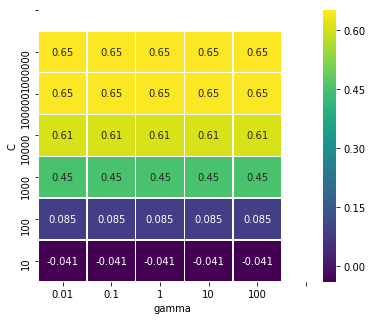

In [59]:
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(6,5))
scores_linear = np.array(results_linear.mean_test_score).reshape(6, 5)
sns.heatmap(scores_linear, linewidths = 0.5 , cmap='viridis', annot=True)
plt.xlabel('gamma')
plt.ylabel('C')
plt.xlim(0, 5)
plt.ylim(0, 6)
plt.xticks(np.arange(6)+0.5, [ 0.01, 0.1, 1, 10, 100])
plt.yticks(np.arange(7)+0.5, [10,100,1000,10000,100000, 1000000])

In [60]:
param_grid = {'C': [1000,10000,100000, 1000000],
              'gamma': [0.1, 1, 10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [1000, 10000, 100000, 1000000], 'gamma': [0.1, 1, 10]}


In [61]:
grid_search_poly = GridSearchCV(SVR(kernel='poly',degree = 2), param_grid, cv=3, return_train_score=True, n_jobs = -1)

In [62]:
grid_search_poly.fit(train_x, train_y)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1000, 10000, 100000, 1000000], 'gamma': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [63]:
print("Best parameters: {}".format(grid_search_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_poly.best_score_))

Best parameters: {'C': 1000000, 'gamma': 1}
Best cross-validation score: 0.79


In [64]:
# convert to DataFrame
results_poly = pd.DataFrame(grid_search_poly.cv_results_)
# show the first 5 rows
display(results_poly.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.872093,0.114889,1.259686,0.011932,1000,0.1,"{'C': 1000, 'gamma': 0.1}",0.054196,0.053810,0.061267,0.056424,0.003428,12,0.061766,0.053156,0.054564,0.056496,0.003771
1,4.650808,0.051599,1.341378,0.085680,1000,1,"{'C': 1000, 'gamma': 1}",0.614081,0.657230,0.671071,0.647460,0.024270,10,0.667682,0.638744,0.633851,0.646759,0.014929
2,9.233642,0.983913,1.225390,0.011072,1000,10,"{'C': 1000, 'gamma': 10}",0.762981,0.783291,0.780755,0.775676,0.009036,6,0.789733,0.774838,0.782344,0.782305,0.006081
3,4.974995,0.382286,1.430216,0.025288,10000,0.1,"{'C': 10000, 'gamma': 0.1}",0.391942,0.431773,0.455070,0.426261,0.026065,11,0.440888,0.419872,0.413993,0.424918,0.011545
4,5.286190,0.023109,1.329978,0.139195,10000,1,"{'C': 10000, 'gamma': 1}",0.705820,0.739127,0.745628,0.730192,0.017436,7,0.747828,0.721053,0.727845,0.732242,0.011365


([<matplotlib.axis.YTick at 0x2b5b6bde2fd0>,
 <a list of 4 Text yticklabel objects>)

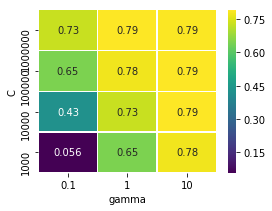

In [67]:
plt.figure(figsize=(4,3))
scores_poly = np.array(results_poly.mean_test_score).reshape(4, 3)
sns.heatmap(scores_poly, linewidths = 0.5 , cmap='viridis', annot=True)
plt.xlabel('gamma')
plt.ylabel('C')
plt.xlim(0, 3)
plt.ylim(0, 4)
plt.xticks(np.arange(3)+0.5, [0.1, 1, 10])
plt.yticks(np.arange(4)+0.5, [1000,10000,100000, 1000000])

##### KNN Regression

In [68]:
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(train_x, train_y)
    train_score_array.append(knn_reg.score(train_x, train_y))
    test_score_array.append(knn_reg.score(test_x, test_y))

Text(0,0.5,'Score')

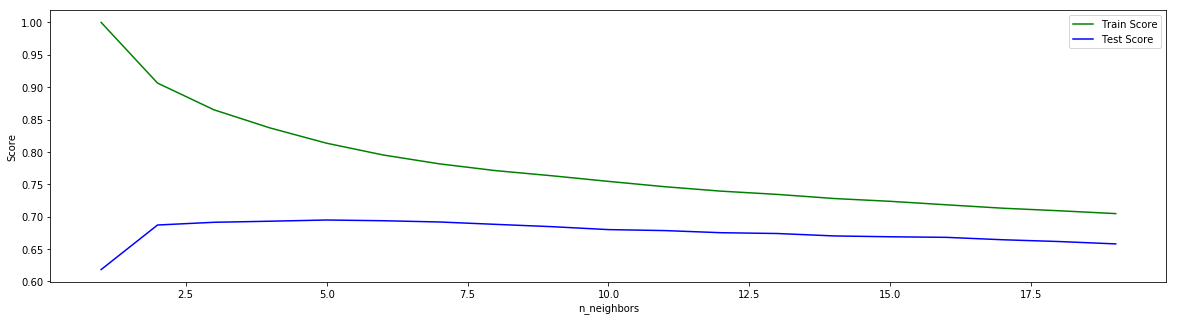

In [69]:
x_axis = range(1,20)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Score')

In [70]:
position_max = test_score_array.index(max(test_score_array))
print(train_score_array[position_max])
print(test_score_array[position_max])

0.8134789095674523
0.6948505351298618


The best KNN model uses the k = 7

##### Decision Tree Regression

In [71]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(random_state=42)
clf.fit(train_x, train_y)

print(clf.score(train_x, train_y))
print(clf.score(test_x, test_y))

0.9999999465329841
0.7408170582545326


In [72]:
clf = DecisionTreeRegressor(random_state=42,min_samples_leaf=10)
clf.fit(train_x, train_y)

print(clf.score(train_x, train_y))
print(clf.score(test_x, test_y))


0.8849901665220716
0.7676783672996916


In [73]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    clf = DecisionTreeRegressor(random_state=42,min_samples_leaf=k)
    clf.fit(train_x, train_y)

    train_score_array.append(clf.score(train_x, train_y))
    test_score_array.append(clf.score(test_x, test_y))

Text(0,0.5,'Score')

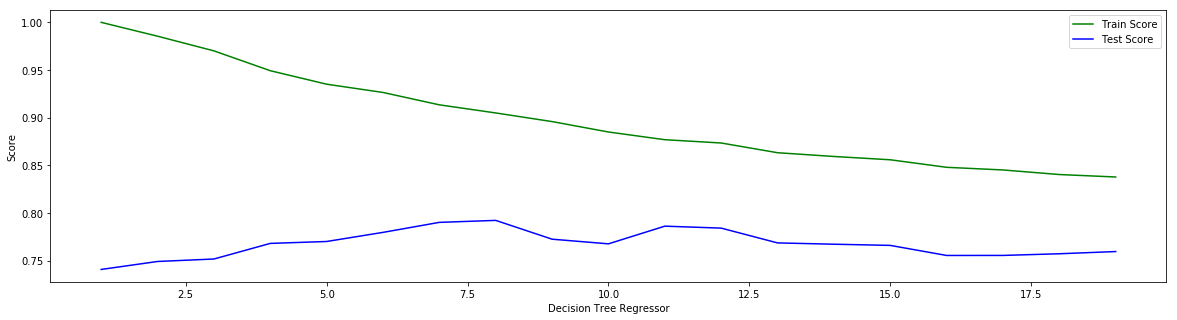

In [74]:
x_axis = range(1,20)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Decision Tree Regressor')
plt.ylabel('Score')

In [75]:
position_max = test_score_array.index(max(test_score_array))
print(train_score_array[position_max])
print(test_score_array[position_max])

0.9049710207011097
0.7922730222593968


The best Decision Tree Regression uses a minimum number of samples for split is 7

##### Final Model
The best model was a second-degree polynomial regression, which yielded a train score of 0.830 and a test score of 0.802

In [76]:
poly = PolynomialFeatures(degree = 2)

poly_train_x = poly.fit_transform(train_x)
poly_test_x = poly.fit_transform(test_x)

poly_reg = LinearRegression()
poly_reg.fit(poly_train_x, train_y)

print(poly_reg.score(poly_train_x, train_y))
print(poly_reg.score(poly_test_x, test_y))

0.8295684467227422
0.8020239189970382


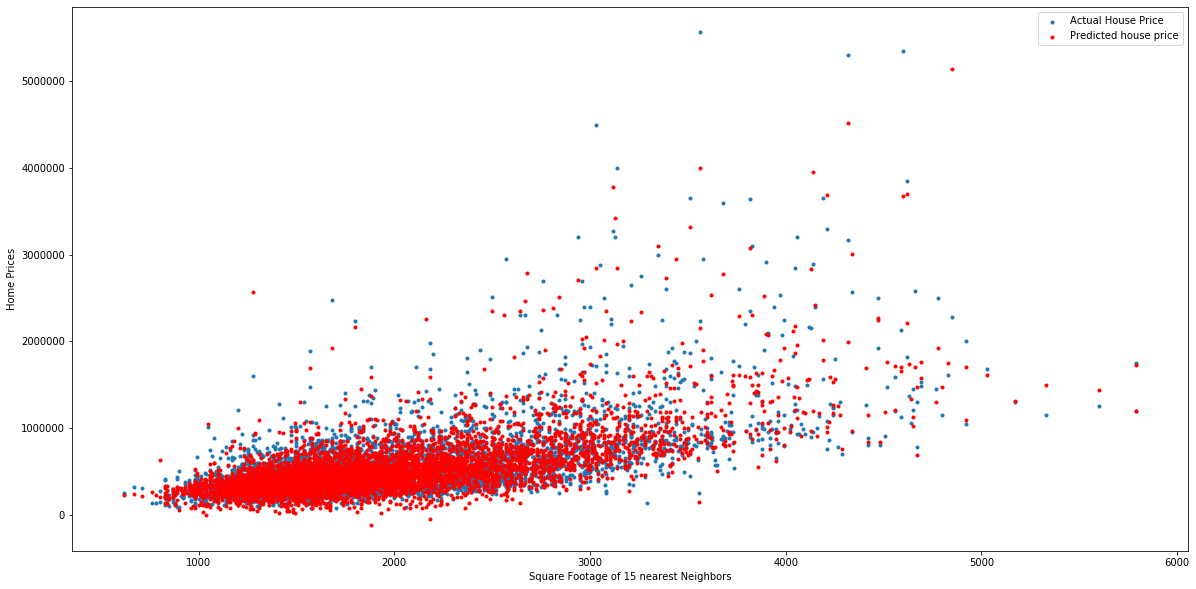

In [77]:
plt.figure(figsize = (20,10))
plt.scatter(test_x_org['sqft_living15'], test_y, marker = '.', label = 'Actual House Price')
plt.scatter(test_x_org['sqft_living15'], poly_reg.predict(poly_test_x), color = 'red', marker = '.', label = 'Predicted house price')
plt.xlabel('Square Footage of 15 nearest Neighbors')
plt.ylabel('Home Prices')
plt.legend()

In the above scatter plot, we can see the actual home prices plotted in blue and the predicted home prices plotted in red. We chose the sqft_living15 as the variable we used to plot against home prices. Graphically, we see that the 2nd degree polynomial regression of the dataset produced a fairly good prediction. It captured the characteristic of the dataset very well in predicting the generally linear relationship between sqft_living 15 and price, but it was also able to predict price on the outskirts of the dataset.

In [78]:
pred_y = pd.DataFrame(poly_reg.predict(poly_test_x))

In [79]:
test_y = pd.DataFrame(test_y)
test_y = test_y.reset_index(drop =True)

In [80]:
diff = pd.concat([test_y, pred_y], axis = 1)
diff.columns = ['actual_price', 'predicted_price']
diff['difference'] = diff['actual_price'] - diff['predicted_price']

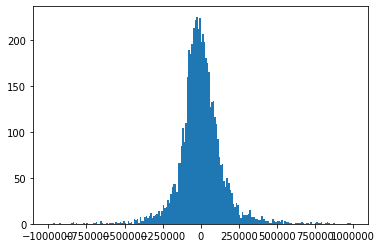

In [81]:
plt.hist(diff['difference'], range = (-1000000, 1000000), bins = 200);

Plotting the errors of the actual price versus predicted price, we see that the error is distributed around a mean of 0. 

###### Run model on entire dataset

In [82]:
poly_x = scaler.transform(df_x)
poly = PolynomialFeatures(degree = 2)
poly_x = poly.fit_transform(poly_x)
print(poly_reg.score(poly_x, df_y))

0.8219504831045671


The overall r-squared score for the entire dataset using a 2nd degree Polynomial Regression is 0.82195

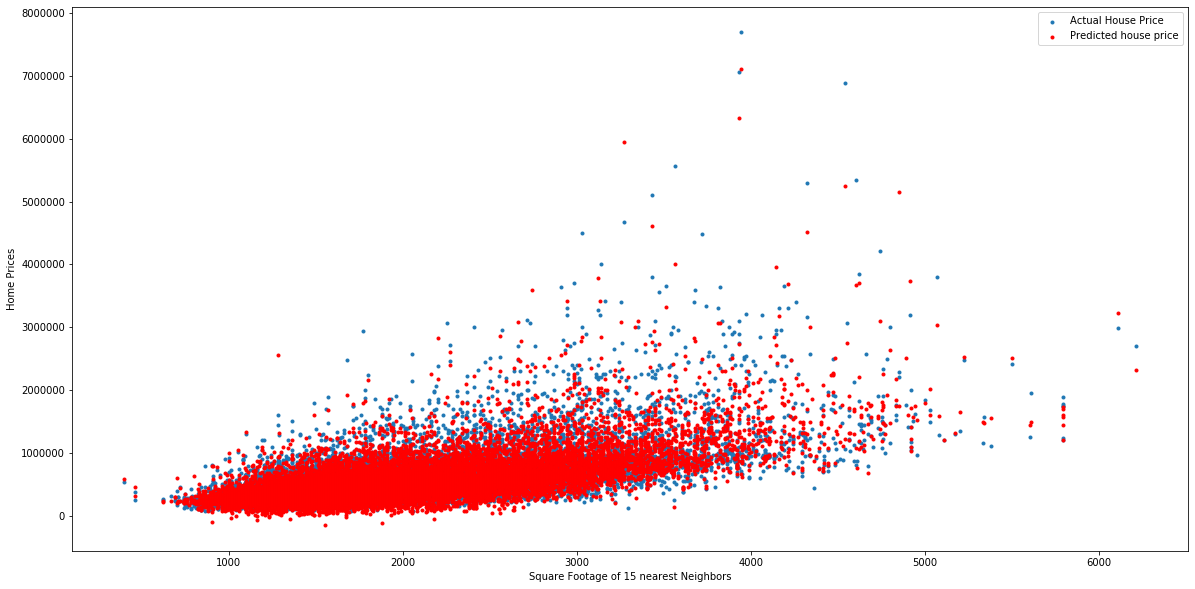

In [83]:
plt.figure(figsize = (20,10))
plt.scatter(df_x['sqft_living15'], df_y, marker = '.', label = 'Actual House Price')
plt.scatter(df_x['sqft_living15'], poly_reg.predict(poly_x), color = 'red', marker = '.', label = 'Predicted house price')
plt.xlabel('Square Footage of 15 nearest Neighbors')
plt.ylabel('Home Prices')
plt.legend()

The above scatter plot shows a plot of sqft_living15 versus Price for the entire dataset. 